<a href="https://colab.research.google.com/github/Spoorthi-2005/codsoft-titanicsurvivalprediction/blob/main/titanicsurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179


Confusion Matrix:
 [[96  9]
 [22 52]]
Passenger 1: Not Survived
Passenger 2: Survived
Passenger 3: Not Survived
Passenger 4: Survived
Passenger 5: Not Survived
Passenger 6: Not Survived
Passenger 7: Not Survived
Passenger 8: Not Survived
Passenger 9: Survived
Passenger 10: Survived
Passenger 11: Survived
Passenger 12: Survived
Passenger 13: Not Survived
Passenger 14: Not Survived
Passenger 15: Not Survived
Passenger 16: Survived
Passenger 17: Not Survived
Passenger 18: Not Survived
Passenger 19: Survived


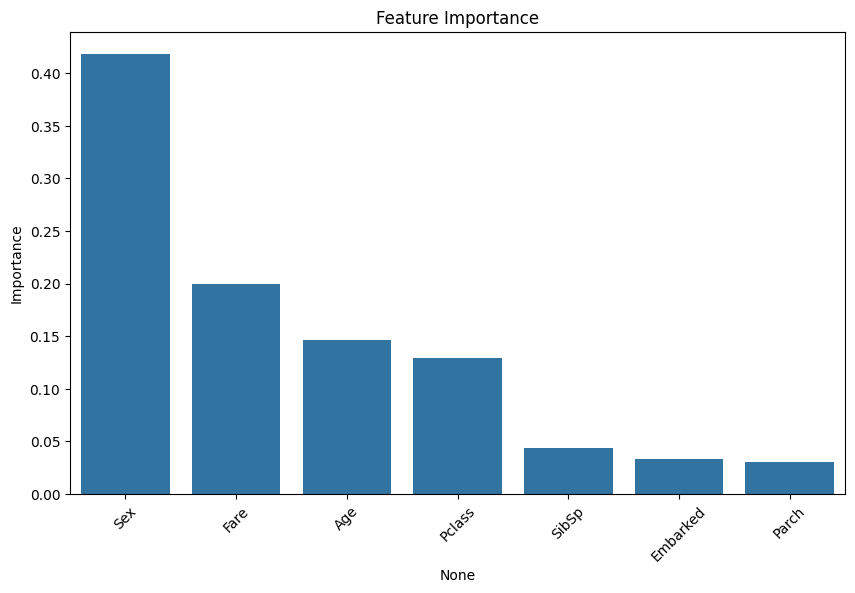

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
titanic_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

# Data preprocessing
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Splitting the dataset into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Model training with best hyperparameters
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Predictions for all passengers
titanic_data['Survived_Predicted'] = rf_model.predict(X)

# Print survival predictions for each person
for index, row in titanic_data.iterrows():
    passenger_id = index + 1
    survived = "Survived" if row['Survived_Predicted'] == 1 else "Not Survived"
    print(f"Passenger {passenger_id}: {survived}")

# Feature importance visualization
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()
